In [2]:
%pylab inline
import pandas as pd
import SpatialDE as sde

Populating the interactive namespace from numpy and matplotlib


In [5]:
sample_info = pd.read_csv('Frog_sample_info.csv', index_col=0)

In [6]:
df = pd.read_csv('data/GSE65785_clutchApolyA_relative_TPM.csv', index_col=0)
df = df[df.sum(1) >= 3]  # Filter practically unobserved genes
dfm = np.log10(df + 1).T

In [7]:
results = pd.read_csv('Frog_final_results.csv')

In [8]:
results.model.value_counts()

SE     20880
PER     1382
Name: model, dtype: int64

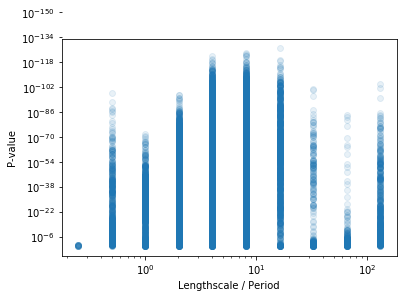

In [9]:
plt.loglog()
plt.scatter(results.l, results.pval, label='Genes', alpha=0.1);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

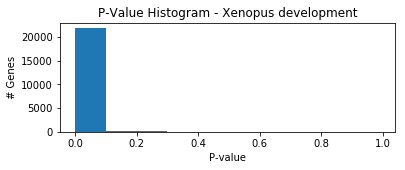

In [11]:
figsize(6, 2)
plt.hist(results.pval, bins=10);
plt.title('P-Value Histogram - Xenopus development')
plt.ylabel('# Genes')
plt.xlabel('P-value');

In [12]:
results.query('qval < 0.05').shape

(20902, 16)

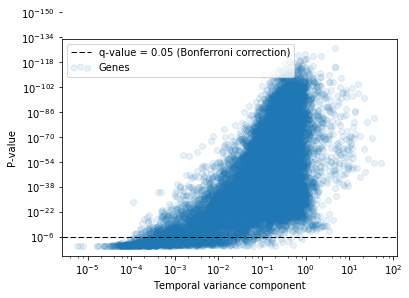

In [13]:
figsize(6, 4)

plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval, label='Genes', alpha=0.1);
plt.gca().invert_yaxis();
plt.xlabel('Temporal variance component')
plt.ylabel('P-value');

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05 (Bonferroni correction)', lw=1, linestyle='--', c='k');
plt.legend(scatterpoints=3);

In [14]:
N = 5
top_per_ls = results.query('qval < 0.05') \
                  .sort_values('qval', ascending=True) \
                  .groupby('l') \
                  .head(N) \
                  .sort_values(['l', 'qval'], ascending=[True, True])
                
top_per_ls.shape

(45, 16)

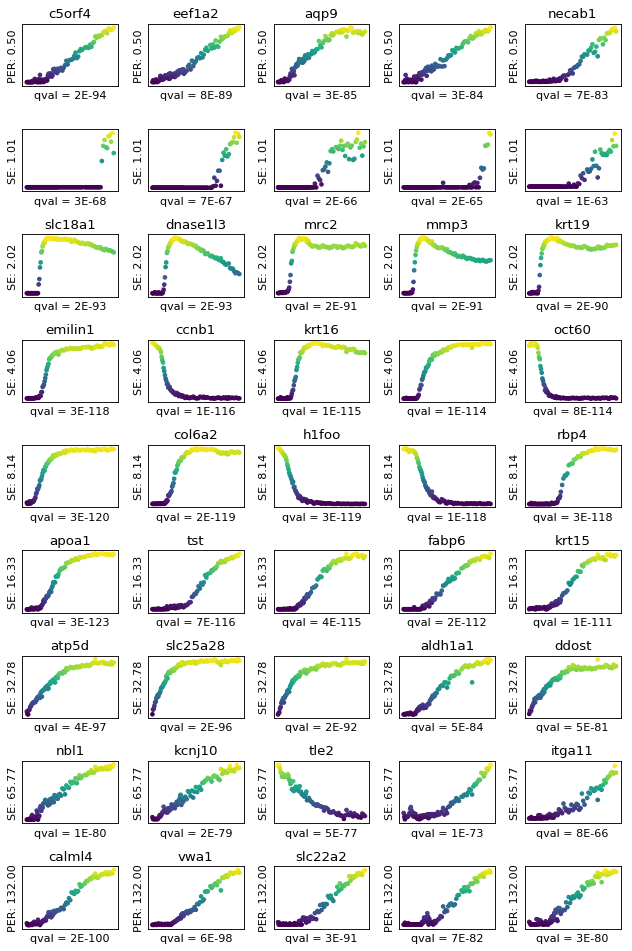

In [33]:
plt.figure(figsize=(8, 12), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.hpf, dfm[r['g']], c=dfm[r['g']], s=10, rasterized=True);
        plt.title(r['g'].split('|')[-1].replace('unnamed', ''))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('top_frog_gene_grid.pdf')

In [29]:
g = dfm.loc[:, dfm.columns.str.endswith('c5orf4')].columns[0]

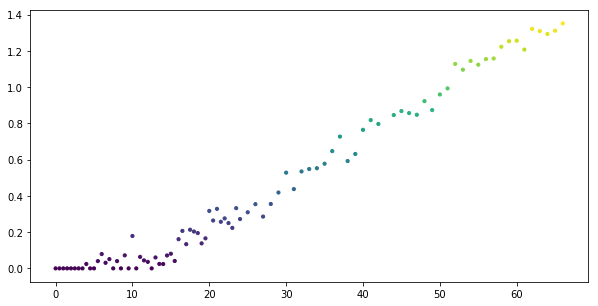

In [37]:
figsize(10, 5)
plt.scatter(sample_info.hpf, dfm[g], c=dfm[g], s=10, rasterized=True);

In [43]:
ls

Frog_final_results.csv      data/
Frog_sample_info.csv        temporal_Frog_analysis.py
Initial frog time-DE.ipynb  top_frog_gene_grid.pdf


In [38]:
from adjustText import adjust_text

21


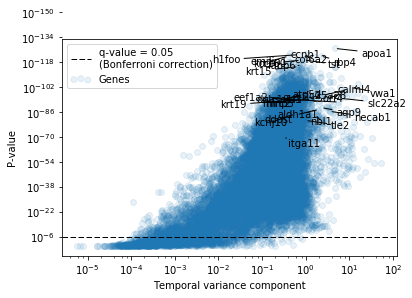

In [44]:
figsize(6, 4)

plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval, label='Genes', alpha=0.1, rasterized=True);

texts = []
for i in top_per_ls.index:
    if results.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    gname = results.loc[i, 'g'].split('|')[-1].replace('unnamed', '')
    texts.append(plt.text(results.loc[i, 'max_s2_t_hat'], results.loc[i, 'pval'], gname))
    
print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
                         force_points=0.1,
                         force_text=0.5,
                         force_objects=0.1,
                         zorder=20,
#                          x=results['max_s2_t_hat'],
#                          y=results['pval'],
                 ))


plt.gca().invert_yaxis();
plt.xlabel('Temporal variance component')
plt.ylabel('P-value');

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05\n(Bonferroni correction)', lw=1, linestyle='--', c='k');
plt.legend(scatterpoints=3);
plt.savefig('frog_gene_sigma_pval.pdf')

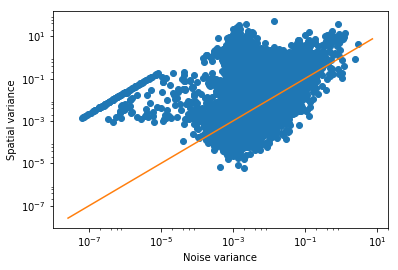

In [48]:
figsize(6, 4)
plt.loglog()
plt.scatter(results.max_delta * results.max_s2_t_hat, results.max_s2_t_hat)
plt.xlabel('Noise variance')
plt.ylabel('Spatial variance');

x = np.linspace(*plt.gca().get_xlim())
plt.plot(x, x, c='C1');


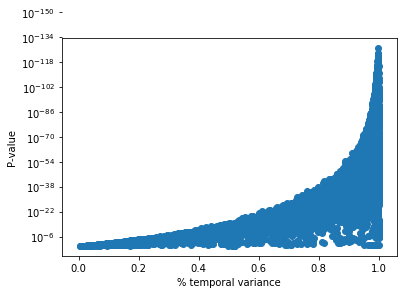

In [50]:
plt.yscale('log')
total_variance = results.max_delta * results.max_s2_t_hat + results.max_s2_t_hat
plt.scatter(results.max_s2_t_hat / total_variance, results.pval)
plt.gca().invert_yaxis();
plt.xlabel('% temporal variance')
plt.ylabel('P-value');

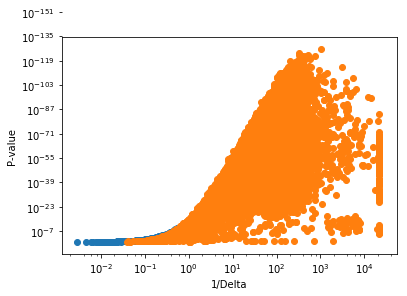

In [51]:
plt.yscale('log')
plt.xscale('log')

for i, g in results.groupby('model'):
    plt.scatter(1. / g.max_delta, g.pval)
    

plt.gca().invert_yaxis();
plt.xlabel('1/Delta')
plt.ylabel('P-value');

In [55]:
results.sort_values('qval', ascending=True).query('qval < 0.05').head(20)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D,pval,qval
20296,Xetro.G01296|apoa1,0.000974,87.085851,1.975793,4.760027,90,0.000785,16.331621,4,SE,-156.172463,-165.840475,252.926326,1.008289e-110,2.244653e-106
19339,Xetro.K01964|,0.003053,145.720819,1.544542,0.437968,90,0.000878,8.137939,4,SE,-273.442399,-101.302311,247.023130,3.695849e-108,8.227699e-104
18656,Xetro.I00903|col6a2,0.001968,119.916749,1.554953,0.951064,90,0.000871,8.137939,4,SE,-221.834258,-125.429299,245.346047,1.977805e-107,4.402989e-103
17001,Xetro.D02353|h1foo,0.003060,114.109704,0.760153,0.678105,90,0.001056,8.137939,4,SE,-210.220169,-130.870349,244.980053,2.852068e-107,6.349273e-103
16805,Xetro.D01297|,0.001343,110.868511,0.911106,1.451455,90,0.000888,8.137939,4,SE,-203.737784,-132.715298,243.583809,1.152510e-106,2.565718e-102
17781,Xetro.G00606|rbp4,0.002142,75.105518,1.887491,2.271255,90,0.000870,8.137939,4,SE,-132.211798,-167.898803,243.004321,2.057582e-106,4.580589e-102
14310,Xetro.K03261|emilin1,0.002448,138.818904,1.297012,0.390913,90,0.000789,4.055081,4,SE,-259.638570,-104.099793,242.918698,2.241555e-106,4.990150e-102
5139,Xetro.A00241|ccnb1,0.001733,91.991403,0.743109,0.956476,90,0.000716,4.055081,4,SE,-165.983568,-147.662060,239.653463,5.873236e-105,1.307500e-100
17586,Xetro.F01452|col1a2,0.002273,108.504066,1.727907,1.094539,90,0.000883,8.137939,4,SE,-199.008894,-130.824972,239.329038,8.124551e-105,1.808688e-100
20127,Xetro.D01633|tst,0.002367,125.258512,1.196823,0.928127,90,0.000778,16.331621,4,SE,-232.517786,-112.946865,238.205377,2.499713e-104,5.564860e-100


In [87]:
from sklearn.preprocessing import scale

In [84]:
top_genes = results.sort_values('qval', ascending=True).head(400)

In [85]:
idx = np.argsort(np.argmax(dfm[top_genes['g']].as_matrix(), 0))[::-1]

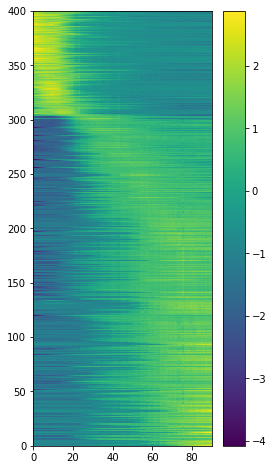

In [93]:
figsize(4, 8)
plt.pcolormesh(scale(dfm[top_genes.iloc[idx]['g']].T, 1));
plt.colorbar()